# EDA On Zomato Dataset
Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008.

#### INTRODUCTION

The dataset contains 1 CSV and 1 Excel file. This Exploratory Data Analysis Notebook will read and analyze the data using visual techniques to discover interesting facts about Zomato.  
Pandas | Matplotlib | Seaborn 

### Import libraries

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import ipywidgets as widgets

### Read the CSV file

In [2]:
df1=pd.read_csv("zomato.csv",encoding="ISO-8859-1")
df1.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


### Read the Excel file

In [3]:
df2=pd.read_excel("Country-Code.xlsx")
df2.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


### Join the 2 dataframes on Country Code

In [4]:
df=pd.merge(df1,df2,on='Country Code',how='left')

### Shape 
- 9551 Rows
- 22 Columns

In [5]:
df.shape

(9551, 22)

### Columns in the DataFrame

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Count and Type of each columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Check for nulls
- **Cuisines** has 9 null entries

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [9]:
#df.dropna()

### Top 3 Countries with the most number of Restaurants 

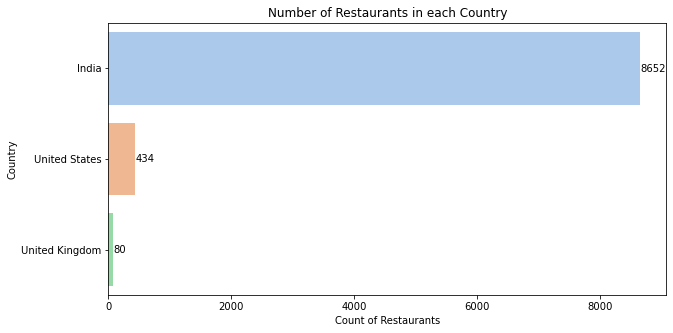

In [10]:
data = df.groupby('Country')['Restaurant ID'].count().reset_index()
data.sort_values('Restaurant ID',ascending = False, inplace = True)

plt.figure(figsize = (10,5))
plt.title('Number of Restaurants in each Country')
sns.set_palette("pastel")
s = sns.barplot(y = 'Country', x='Restaurant ID', data=data[:3], orient = 'h')
s.set_xlabel("Count of Restaurants")
s.set_ylabel("Country")
s.bar_label(s.containers[0])
plt.show()

### Top 3 Countries with the least number of Restaurants 

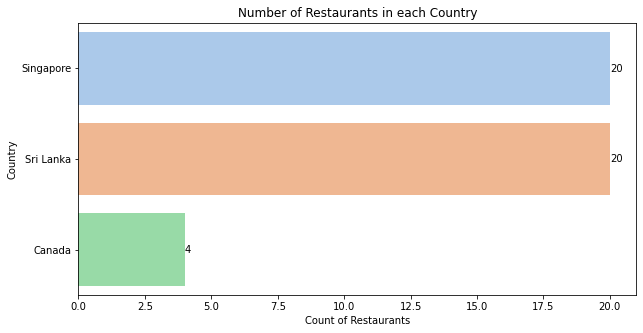

In [11]:
data = df.groupby('Country')['Restaurant ID'].count().reset_index()
data.sort_values('Restaurant ID',ascending = False, inplace = True)

plt.figure(figsize = (10,5))
plt.title('Number of Restaurants in each Country')
sns.set_palette("pastel")
s = sns.barplot(y = 'Country', x='Restaurant ID', data=data[-3:], orient = 'h')
s.set_xlabel("Count of Restaurants")
s.set_ylabel("Country")
s.bar_label(s.containers[0])
plt.show(s)

### Textual data cleaning to display a word cloud of cuisines

In [12]:
data = df

# Change the datatype of Cuisines to String
data['Cuisines'] = data['Cuisines'].astype(str) 

# Group the dataFrame by countries and join the cuisines to get one big comma seperated string for each country
data = df.groupby(['Country'])['Cuisines'].apply(lambda x: ','.join(x)).reset_index()
data = data.set_index(['Country'])
data.head(3)

,Cuisines
Country,
Australia,"Bar Food, Steak,Modern Australian,Pizza, Bar F..."
Brazil,"Fast Food, French,Cafe,Bakery,Brazilian,Pizza,..."
Canada,"Japanese, Sushi,Chinese, Canadian,Italian, Med..."


In [13]:
#Remove unwanted blank spaces
for country in data.index:
    l = ''
    for word in data['Cuisines'][country].split(','):
        l+= ','+word.strip()
    data['Cuisines'][country] = l[1:]
data.head(3)

,Cuisines
Country,
Australia,"Bar Food,Steak,Modern Australian,Pizza,Bar Foo..."
Brazil,"Fast Food,French,Cafe,Bakery,Brazilian,Pizza,J..."
Canada,"Japanese,Sushi,Chinese,Canadian,Italian,Medite..."


### Cuisine word cloud

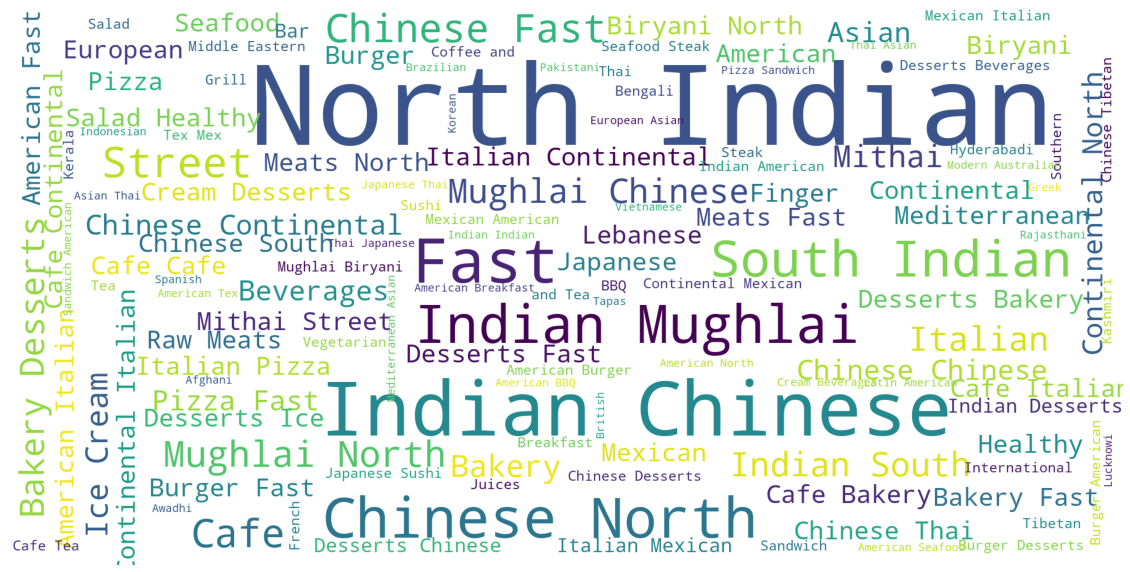

In [14]:
l = ''
for cuisine in data['Cuisines']:
    l+=','+cuisine.strip()

wordcloud = WordCloud(
        background_color='white',
        stopwords = ['Food'],
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(l[1:])

fig = plt.figure(1, figsize=(20,20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [15]:
def show_wordcloud(data, title = None):
    
    # Define word cloud
    wordcloud = WordCloud(
        background_color='white',
        stopwords = ['Food'],
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

In [16]:
def dropdown(Country):
     show_wordcloud(data['Cuisines'][Country], Country)

### Word Cloud of Cuisines based on various countries

In [17]:
widgets.interact(dropdown,Country = df['Country'].unique())

interactive(children=(Dropdown(description='Country', options=('Phillipines', 'Brazil', 'United States', 'Aust…

<function __main__.dropdown(Country)>

### Scatter plot showing value for money (Cost v/s Rating)

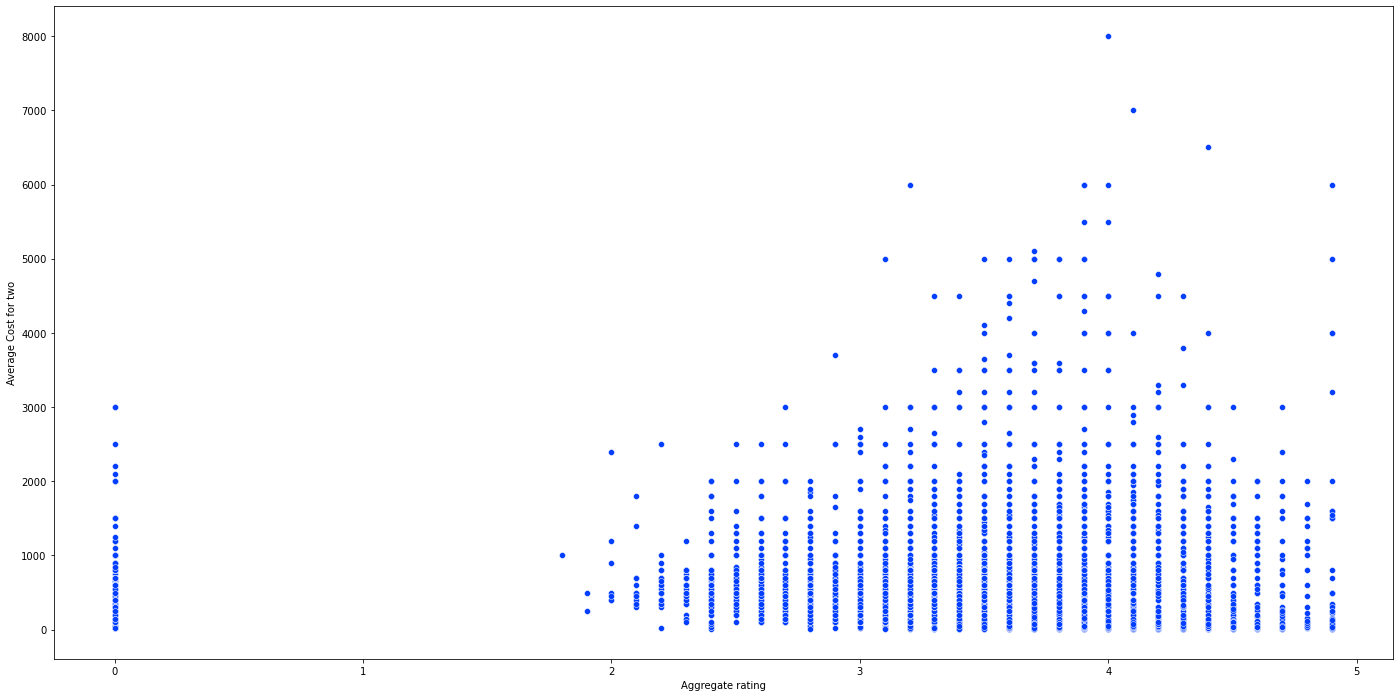

In [18]:
data = df.loc[(df['Average Cost for two']>0)&(df['Average Cost for two']<10000)]
plt.figure(figsize = (24,12))
sns.set_palette("bright")
s = sns.scatterplot(data=data, y=data["Average Cost for two"], x=data["Aggregate rating"])
plt.show()

### Top voted restaurants world wide

In [19]:
top = df[["Votes","Restaurant Name","Country","City"]].sort_values(by=['Votes'], ascending=False).head(5)
top

,Votes,Restaurant Name,Country,City
728,10934,Toit,India,Bangalore
735,9667,Truffles,India,Bangalore
3994,7931,Hauz Khas Social,India,New Delhi
2412,7574,Peter Cat,India,Kolkata
739,6907,AB's - Absolute Barbecues,India,Bangalore


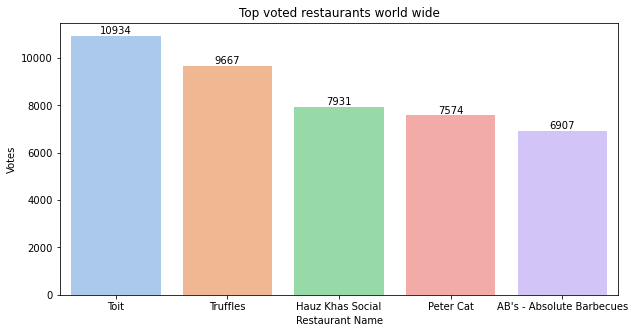

In [20]:
plt.figure(figsize = (10,5))
plt.title('Top voted restaurants world wide')
sns.set_palette("pastel")
s = sns.barplot(x = 'Restaurant Name', y='Votes', data=top,ci=None)
s.bar_label(s.containers[0])
plt.show()

### Top voted restaurants by country

In [21]:
def topVotedRests(Country):
    plt.figure(figsize = (15,5))
    top = df[(df['Country']==Country)][["Votes","Restaurant Name","City"]].sort_values(by=['Votes'], ascending=False).head(5)
    s = sns.barplot(x = 'Restaurant Name', y='Votes', data=top,ci=None)
    s.bar_label(s.containers[0])
    return top

In [22]:
widgets.interact(topVotedRests,Country = df['Country'].unique())

interactive(children=(Dropdown(description='Country', options=('Phillipines', 'Brazil', 'United States', 'Aust…

<function __main__.topVotedRests(Country)>

### Rating distribution

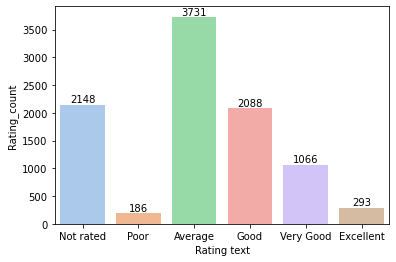

In [23]:
rating = data.groupby('Rating text').size().reset_index().rename(columns={0:"Rating_count"})
rating['ix'] = {3:'Average', 6:'Excellent', 4:'Good', 1:'Not rated', 2:'Poor', 5:'Very Good'}
rating = rating.sort_values(by='ix')
s = sns.barplot(x = 'Rating text', y='Rating_count', data=rating,ci=None)
s.bar_label(s.containers[0])
plt.show()

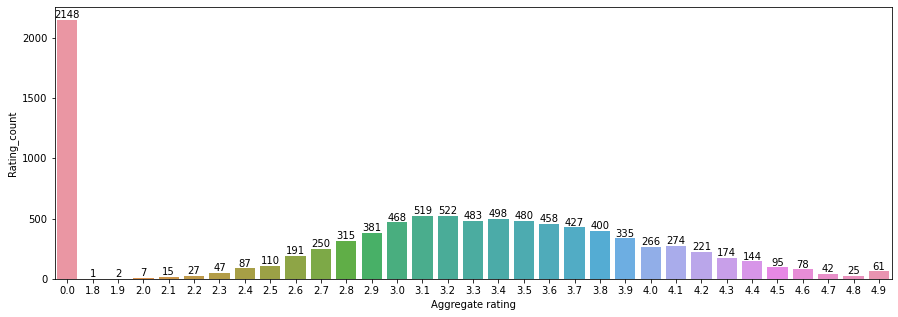

In [24]:
data = df
plt.figure(figsize = (15,5))
rating = data.groupby('Aggregate rating').size().reset_index().rename(columns={0:"Rating_count"})
s = sns.barplot(x = 'Aggregate rating', y='Rating_count', data=rating,ci=None)
s.bar_label(s.containers[0])
plt.show()

### Rating Count by Country

In [25]:
def showRatingPlot(Country):    
    data = df[df['Country']==Country]
    rating = data.groupby('Rating text').size().reset_index().rename(columns={0:"Rating_count"})
    s = sns.barplot(x = 'Rating text', y='Rating_count', data=rating,ci=None)
    s.bar_label(s.containers[0])
    return rating

In [26]:
widgets.interact(showRatingPlot,Country = df['Country'].unique())

interactive(children=(Dropdown(description='Country', options=('Phillipines', 'Brazil', 'United States', 'Aust…

<function __main__.showRatingPlot(Country)>

### Top rated Restaurants by Country

In [27]:
def Excellent(Country):
    data = df[(df['Rating text']=='Excellent') & (df['Country']==Country)][['Restaurant Name','City','Votes']].sort_values(by='Votes',ascending=False)
    return data.head(10)

In [28]:
widgets.interact(Excellent,Country = df['Country'].unique())

interactive(children=(Dropdown(description='Country', options=('Phillipines', 'Brazil', 'United States', 'Aust…

<function __main__.Excellent(Country)>

### Poor rated Restaurants by Country

In [29]:
def Poor(Country):
    data = df[((df['Rating text']=='Average') | (df['Rating text']=='Poor')) & (df['Country']==Country)][['Restaurant Name','City','Votes']].sort_values(by='Votes',ascending=False)
    return data.head(10)

In [30]:
widgets.interact(Poor,Country = df['Country'].unique())

interactive(children=(Dropdown(description='Country', options=('Phillipines', 'Brazil', 'United States', 'Aust…

<function __main__.Poor(Country)>

### Cities in India with top restaurants

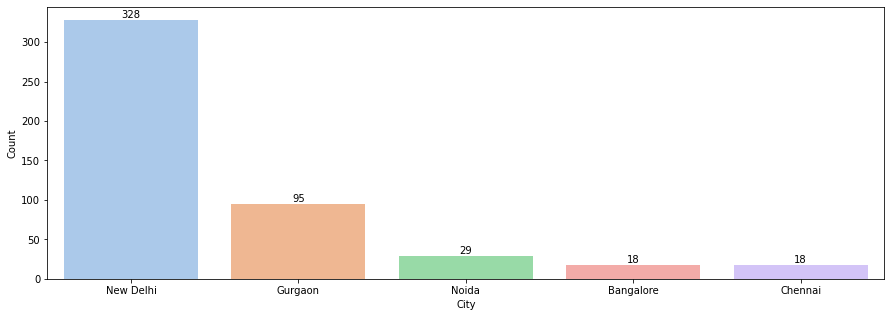

In [31]:
data = df[((df['Rating text']=='Excellent') | (df['Rating text']=='Very Good')) & (df['Country']=='India')][['Restaurant Name','City','Votes']].sort_values(by='Votes',ascending=False)
data = data.groupby('City').size().reset_index().rename(columns={0:"Count"})
data = data.sort_values(by='Count',ascending=False)
plt.figure(figsize = (15,5))
s = sns.barplot(x = 'City', y='Count', data=data[:5],ci=None)
s.bar_label(s.containers[0])
plt.show()

### Cities in India with poor rated restaurants

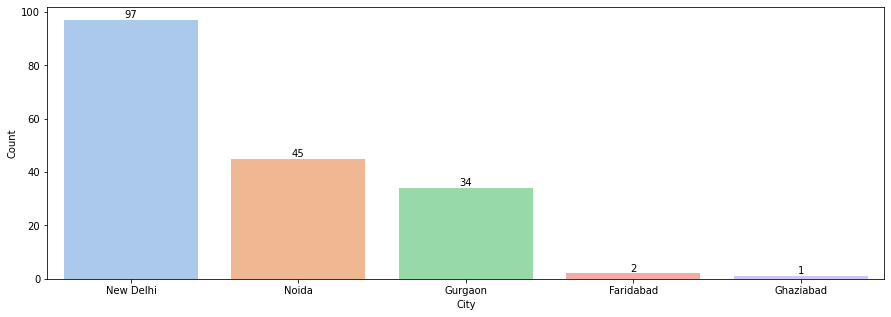

In [32]:
data = df[(df['Rating text']=='Poor') & (df['Country']=='India')][['Restaurant Name','City','Votes']].sort_values(by='Votes',ascending=False)
data = data.groupby('City').size().reset_index().rename(columns={0:"Count"})
data = data.sort_values(by='Count',ascending=False)
plt.figure(figsize = (15,5))
s = sns.barplot(x = 'City', y='Count', data=data[:5],ci=None)
s.bar_label(s.containers[0])
plt.show()

# Observations

- Zomato has the most number of restaurants in **India**
- **North Indian** is the most popular cuisine
- Rating follows **Normal distribution**
- **New Delhi** has the most number of top rated Restaurants in India